In [54]:
import numpy as np
import pandas as pd 
import seaborn as sn
from IPython.display import display

In [6]:
data = pd.read_csv('C:/Users/D/Desktop/Java/MachineLearning/Data Incubator_Code/My_Data_Proj/ted_talks/ted_main.csv')

In [7]:
print(data.columns.values)

['comments' 'description' 'duration' 'event' 'film_date' 'languages'
 'main_speaker' 'name' 'num_speaker' 'published_date' 'ratings'
 'related_talks' 'speaker_occupation' 'tags' 'title' 'url' 'views']


In [30]:
lengthUrl = data['url'].map(lambda x: len(x))
lengthDesc = data['description'].map(lambda x:len(x))
lengthTitle = data['title'].map(lambda x: len(x))
NumTags = data['tags'].map(lambda x: (x.count(',')+1))

In [40]:
length_data = pd.concat((lengthUrl, lengthDesc, lengthTitle, NumTags), axis = 1)
length_data.columns = ['lengthUrl', 'lengthDesc', 'lengthTitle','NumTags']

In [156]:
combined_data = pd.concat((data, length_data), axis = 1)
print(combined_data.columns.values)

['comments' 'description' 'duration' 'event' 'film_date' 'languages'
 'main_speaker' 'name' 'num_speaker' 'published_date' 'ratings'
 'related_talks' 'speaker_occupation' 'tags' 'title' 'url' 'views'
 'lengthUrl' 'lengthDesc' 'lengthTitle' 'NumTags']


In [114]:
cont_data = combined_data.drop(['description',  'event', 'film_date', 
 'main_speaker', 'name',  'published_date', 'ratings',
 'related_talks', 'speaker_occupation', 'tags', 'title', 'url'], axis = 1)
print(cont_data.columns.values)

['comments' 'duration' 'languages' 'num_speaker' 'views' 'lengthUrl'
 'lengthDesc' 'lengthTitle' 'NumTags']


C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


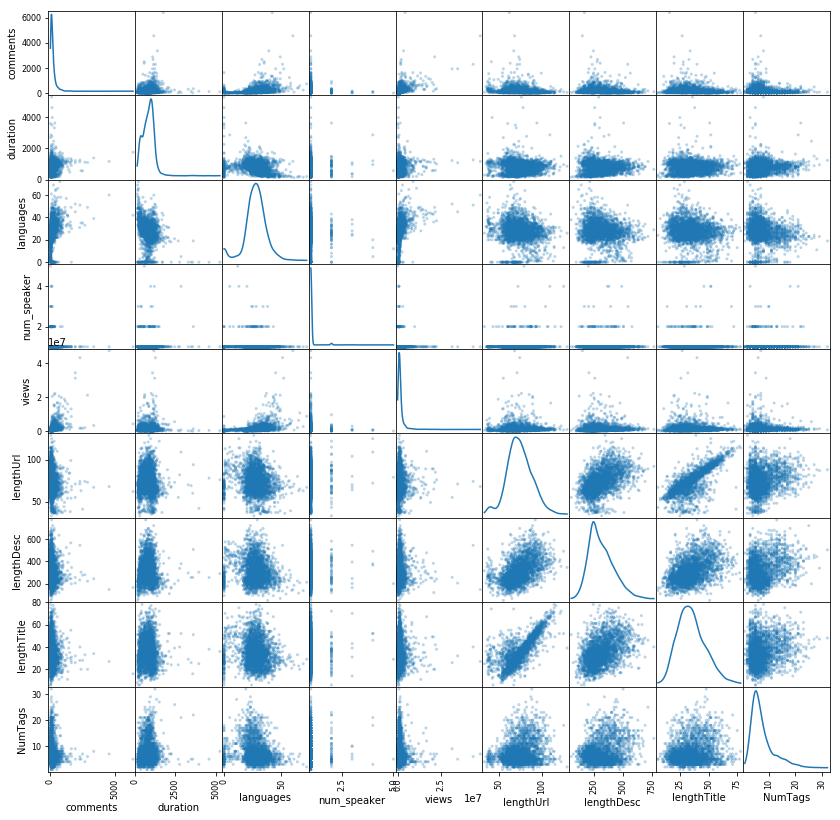

In [115]:
from seaborn import heatmap

scatter = pd.scatter_matrix(cont_data, alpha = 0.3, figsize = (14,14), diagonal = 'kde')


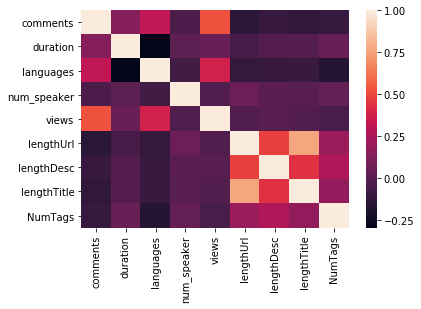

In [68]:
heatmap(cont_data.corr())

In [116]:
views_comments = cont_data.drop(['duration', 'languages' ,'num_speaker', 'lengthUrl',
 'lengthDesc', 'lengthTitle', 'NumTags'], axis = 1)

views_comments.corr()

,comments,views
comments,1.000000,0.530939
views,0.530939,1.000000


      views       main_speaker                           speaker_occupation
0  47227110       Ken Robinson                              Author/educator
1  43155405          Amy Cuddy                          Social psychologist
2  34309432        Simon Sinek                            Leadership expert
3  31168150        Brené Brown                     Vulnerability researcher
4  22270883         Mary Roach                                       Writer
5  21594632    Julian Treasure                             Sound consultant
6  21190883  Jill Bolte Taylor                               Neuroanatomist
7  20685401       Tony Robbins  Life coach; expert in leadership psychology
8  20475972       James Veitch                          Comedian and writer
9  19787465    Cameron Russell                                        Model


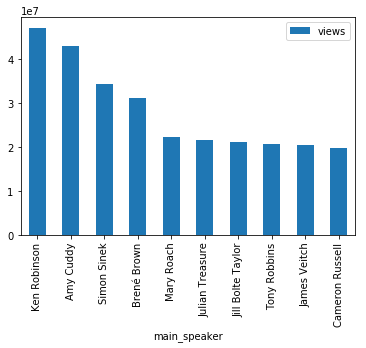

In [164]:
top_views = combined_data.groupby(['views', 'main_speaker', 'speaker_occupation']).sum().sort_values(['views'], axis = 0, ascending = False)
top_10 = pd.DataFrame(data = top_views.iloc[:10,:0]).reset_index()
print(top_10)

top_10.set_index('main_speaker').plot(kind = 'bar')

        main_speaker  comments           speaker_occupation
0    Richard Dawkins      6404       Evolutionary biologist
1       Ken Robinson      4553              Author/educator
2         Sam Harris      3356  Neuroscientist, philosopher
3  Jill Bolte Taylor      2877               Neuroanatomist
4     David Chalmers      2673                  Philosopher
5     Janet Echelman      2492                       Artist
6    Lesley Hazleton      2374         Writer, psychologist
7          Amy Cuddy      2290          Social psychologist
8    Michael Specter      2272                       Writer
9        Simon Sinek      1930            Leadership expert


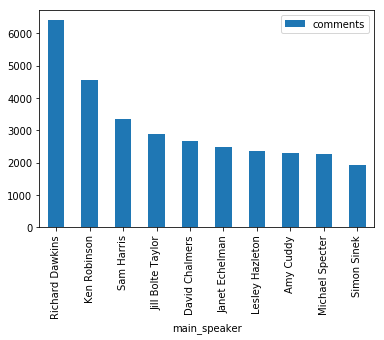

In [173]:
top_comments = combined_data.groupby(['main_speaker', 'comments', 'speaker_occupation']).sum().sort_values('comments', axis = 0, ascending = False)
#print(top_comments)
top_10C = pd.DataFrame(data = top_comments.iloc[:10,:0]).reset_index()
print(top_10C)
top_10C.set_index('main_speaker').plot(kind = 'bar')

13.775169934640523

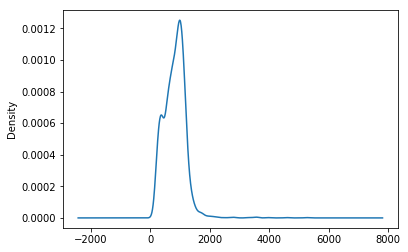

In [181]:
cont_data['duration'].plot(kind='kde')
np.mean(cont_data['duration'])/60

In [256]:
top_descriptions = combined_data.groupby(['views', 'main_speaker', 'description']).sum().sort_values('views', axis = 0, ascending = False)
top_desc_trunk = top_descriptions.iloc[:,:0].reset_index()
#print(top_desc_trunk)

In [211]:
dlist = []
for x in range(top_descriptions.shape[0]):
    dlist.append(top_desc_trunk.iloc[x,2])
    

In [226]:
len(dlist)

2550

In [244]:
from sklearn.feature_extraction.text import CountVectorizer 

vector = CountVectorizer(dlist, stop_words = 'english')

In [245]:
print(vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.', 'Body language affects how others see us, but it may also change how we see ourselves. Social psychologist Amy Cuddy argues that "power posi... timely message for today -- as the nation struggles in the aftermath of a devastating earthquake."],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [246]:
vector_fit = vector.fit(dlist)
vector_words = vector.get_feature_names()

word_matrix = vector.fit_transform(dlist).toarray()


freq_matrix = pd.DataFrame(word_matrix, columns = vector.get_feature_names())

In [247]:
total = freq_matrix.sum(axis = 0).sort_values(axis = 0, ascending = False)

In [253]:
top_words_all = total[:10]
print(top_words)

talk      702
world     526
new       419
says      411
people    334
shares    326
life      310
shows     282
ted       263
like      262
dtype: int64


In [259]:
top10view = top_desc_trunk[:10]

In [260]:
top10view_list = []
for x in range(10):
    top10view_list.append(top_desc_trunk.iloc[x,2])

In [263]:
vector_10 = CountVectorizer(top10view_list, stop_words = 'english')

vector_fit_10 = vector_10.fit(top10view_list)

top_matrix = vector_10.fit_transform(top10view_list).toarray()

freq_matrix_top = pd.DataFrame(top_matrix, columns = vector_10.get_feature_names())

In [264]:
top_total = freq_matrix_top.sum(axis = 0).sort_values(axis = 0, ascending = False)

In [266]:
print(top_total[:10])

talk          7
research      3
amy           2
brain         2
sound         2
social        2
model         2
confidence    2
powerful      2
help          2
dtype: int64
